In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
import os.path
import matplotlib.image as mpimg
import seaborn as sns
from bootstrapped import bootstrap as bs
from bootstrapped import compare_functions as bs_compare
from bootstrapped import stats_functions as bs_stats

In [75]:
properties = pd.read_csv("DC_Properties.csv")

C:\Users\Artem\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Функция, уменьшающая размер данных без ущерба самим данным

In [76]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:

                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [77]:
reduce_mem_usage(properties)

Memory usage of dataframe is 59.42 MB
Memory usage after optimization is: 29.50 MB
Decreased by 50.4%


Unnamed: 0  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  \
0                0       4          0      Warm Cool  Y        2.0      8   
1                1       3          1      Warm Cool  Y        2.0     11   
2                2       3          1  Hot Water Rad  Y        2.0      9   
3                3       3          1  Hot Water Rad  Y        2.0      8   
4                4       2          1      Warm Cool  Y        1.0     11   
...            ...     ...        ...            ... ..        ...    ...   
158952      158952       1          0     Forced Air  Y        NaN      3   
158953      158953       1          0     Forced Air  Y        NaN      4   
158954      158954       2          0     Forced Air  Y        NaN      4   
158955      158955       1          0      Warm Cool  Y        NaN      2   
158956      158956       1          0      Warm Cool  Y        NaN      2   

        BEDRM     AYB  YR_RMDL  ...  LONGITUDE       ASSESSMENT_NBHD  \
0           4  1910.0   1988.0  ... -77.040833            Old City 2   
1           5  1898.0   2007.0  ... -77.040764            Old City 2   
2           5  1910.0   2009.0  ... -77.040680            Old City 2   
3           5  1900.0   2003.0  ... -77.040627            Old City 2   
4           3  1913.0   2012.0  ... -77.039360            Old City 2   
...       ...     ...      ...  ...        ...                   ...   
158952      1  1938.0   2006.0  ... -77.019417            Old City 2   
158953      2  1938.0   2006.0  ... -77.019417            Old City 2   
158954      2  1920.0   2007.0  ... -77.019417            Old City 2   
158955      0  1965.0      NaN  ... -77.018227  Southwest Waterfront   
158956      0  1965.0      NaN  ... -77.018227  Southwest Waterfront   

       ASSESSMENT_SUBNBHD  CENSUS_TRACT CENSUS_BLOCK    WARD  SQUARE  \
0        040 D Old City 2        4201.0  004201 2006  Ward 2     152   
1        040 D Old City 2        4201.0  004201 2006  Ward 2     152   
2        040 D Old City 2        4201.0  004201 2006  Ward 2     152   
3        040 D Old City 2        4201.0  004201 2006  Ward 2     152   
4        040 D Old City 2        4201.0  004201 2006  Ward 2     152   
...                   ...           ...          ...     ...     ...   
158952   040 B Old City 2        4801.0          NaN  Ward 6     477   
158953   040 B Old City 2        4801.0          NaN  Ward 6     477   
158954   040 B Old City 2        4801.0          NaN  Ward 6     477   
158955                NaN       11000.0          NaN  Ward 6     504   
158956                NaN       11000.0          NaN  Ward 6     504   

                X          Y QUADRANT  
0      -77.040428  38.914883       NW  
1      -77.040428  38.914883       NW  
2      -77.040428  38.914883       NW  
3      -77.040428  38.914883       NW  
4      -77.040428  38.914883       NW  
...           ...        ...      ...  
158952 -77.019424  38.911846       NW  
158953 -77.019424  38.911846       NW  
158954 -77.019424  38.911846       NW  
158955 -77.018234  38.872959       SW  
158956 -77.018234  38.872959       SW  

[158957 rows x 49 columns]

# Просмотр данных

In [78]:
properties.head()

Unnamed: 0  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  BEDRM  \
0           0       4          0      Warm Cool  Y        2.0      8      4   
1           1       3          1      Warm Cool  Y        2.0     11      5   
2           2       3          1  Hot Water Rad  Y        2.0      9      5   
3           3       3          1  Hot Water Rad  Y        2.0      8      5   
4           4       2          1      Warm Cool  Y        1.0     11      3   

      AYB  YR_RMDL  ...  LONGITUDE  ASSESSMENT_NBHD ASSESSMENT_SUBNBHD  \
0  1910.0   1988.0  ... -77.040833       Old City 2   040 D Old City 2   
1  1898.0   2007.0  ... -77.040764       Old City 2   040 D Old City 2   
2  1910.0   2009.0  ... -77.040680       Old City 2   040 D Old City 2   
3  1900.0   2003.0  ... -77.040627       Old City 2   040 D Old City 2   
4  1913.0   2012.0  ... -77.039360       Old City 2   040 D Old City 2   

   CENSUS_TRACT CENSUS_BLOCK    WARD  SQUARE          X          Y QUADRANT  
0        4201.0  004201 2006  Ward 2     152 -77.040428  38.914883       NW  
1        4201.0  004201 2006  Ward 2     152 -77.040428  38.914883       NW  
2        4201.0  004201 2006  Ward 2     152 -77.040428  38.914883       NW  
3        4201.0  004201 2006  Ward 2     152 -77.040428  38.914883       NW  
4        4201.0  004201 2006  Ward 2     152 -77.040428  38.914883       NW  

[5 rows x 49 columns]

In [79]:
properties.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [80]:
properties = properties.drop('Unnamed: 0', axis = 1)

In [81]:
properties.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA',
       'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE',
       'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT',
       'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

Достаточно много колонок, многие из которых, скорее всего, не принесут большой пользы

# Анализ пропущенных значений

In [82]:
def nan_analize(X):
    nan_df = (X.isna().sum() / X.shape[0]).reset_index()
    nan_df.columns=['feature', 'nan_percent']

    plt.figure(figsize=(16,4))
    sns.barplot(nan_df['feature'], nan_df['nan_percent'])
    plt.title('Percent Missing')
    plt.ylabel('Missing', fontsize=12)
    plt.xlabel('Features', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

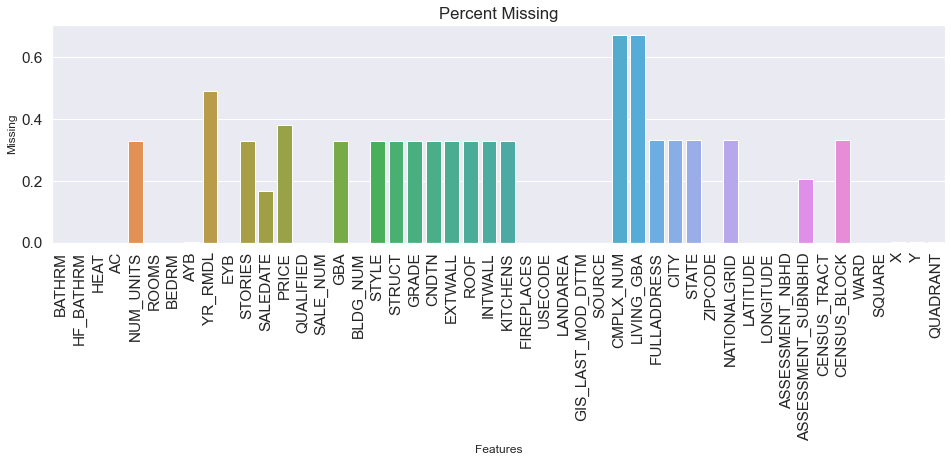

In [83]:
nan_analize(properties)

In [84]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 48 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   BATHRM              158957 non-null  int8    
 1   HF_BATHRM           158957 non-null  int8    
 2   HEAT                158957 non-null  category
 3   AC                  158957 non-null  category
 4   NUM_UNITS           106696 non-null  float32 
 5   ROOMS               158957 non-null  int8    
 6   BEDRM               158957 non-null  int8    
 7   AYB                 158686 non-null  float32 
 8   YR_RMDL             80928 non-null   float32 
 9   EYB                 158957 non-null  int16   
 10  STORIES             106652 non-null  float32 
 11  SALEDATE            132187 non-null  category
 12  PRICE               98216 non-null   float32 
 13  QUALIFIED           158957 non-null  category
 14  SALE_NUM            158957 non-null  int8    
 15  GBA              

Пропущенных значений достаточно много. Самый многообещающий столбец с ценой домов тоже содержит около 40% пропущенных значений. Их вряд ли удастся правдоподобно восстановить.

In [85]:
median = properties['AYB'].median()
properties['AYB'] = properties['AYB'].fillna(median)

# Удаляю ненужные столбцы

## Решил удалить номер корпуса и аттрибут рядом с ним, очень много пропусков и скорее всего данные ни на что не влияют

In [86]:
properties = properties.drop(['CMPLX_NUM', 'LIVING_GBA'], axis = 1) 

In [87]:
properties.describe()

BATHRM      HF_BATHRM      NUM_UNITS          ROOMS  \
count  158957.000000  158957.000000  106696.000000  158957.000000   
mean        1.810678       0.458237       1.198039       6.187736   
std         0.976396       0.587571       0.596826       2.618165   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       1.000000       4.000000   
50%         2.000000       0.000000       1.000000       6.000000   
75%         2.000000       1.000000       1.000000       7.000000   
max        14.000000      11.000000       6.000000      48.000000   

               BEDRM            AYB       YR_RMDL            EYB  \
count  158957.000000  158957.000000  80928.000000  158957.000000   
mean        2.732506    1941.787476   1998.287842    1963.718024   
std         1.358864      33.611938     16.575996      24.923150   
min         0.000000    1754.000000     20.000000    1800.000000   
25%         2.000000    1918.000000   1985.000000    1954.000000   
50%         3.000000    1937.000000   2004.000000    1963.000000   
75%         3.000000    1960.000000   2010.000000    1975.000000   
max        24.000000    2019.000000   2019.000000    2018.000000   

             STORIES         PRICE  ...       KITCHENS     FIREPLACES  \
count  106652.000000  9.821600e+04  ...  106695.000000  158957.000000   
mean        2.091793  9.313616e+05  ...       1.219251       2.374674   
std         2.932350  7.061127e+06  ...       0.621165     737.295595   
min         0.000000  1.000000e+00  ...       0.000000       0.000000   
25%         2.000000  2.400000e+05  ...       1.000000       0.000000   
50%         2.000000  3.999990e+05  ...       1.000000       0.000000   
75%         2.000000  6.520000e+05  ...       1.000000       1.000000   
max       826.000000  1.374276e+08  ...      44.000000  293920.000000   

             USECODE       LANDAREA        ZIPCODE       LATITUDE  \
count  158957.000000  158957.000000  158956.000000  158956.000000   
mean       14.252999    2473.282158   19985.519531      38.955627   
std         3.725736    5059.046023      31.348238       0.051659   
min        11.000000       0.000000   20001.000000      38.819733   
25%        11.000000     697.000000   20007.000000      38.895424   
50%        13.000000    1649.000000   20011.000000      38.915337   
75%        17.000000    3000.000000   20018.000000      38.936073   
max       117.000000  942632.000000   20392.000000      38.995541   

           LONGITUDE   CENSUS_TRACT              X              Y  
count  158956.000000  158956.000000  158720.000000  158720.000000  
mean      -77.006508    5349.772949     -77.006538      38.955780  
std         0.042183    3369.190918       0.042178       0.051763  
min       -77.113907     100.000000     -77.113136      38.820576  
25%       -77.042892    2102.000000     -77.042892      38.895432  
50%       -77.019600    5201.000000     -77.019585      38.915230  
75%       -76.988625    8302.000000     -76.988846      38.936077  
max       -76.909760   11100.000000     -76.910507      38.993645  

[8 rows x 23 columns]

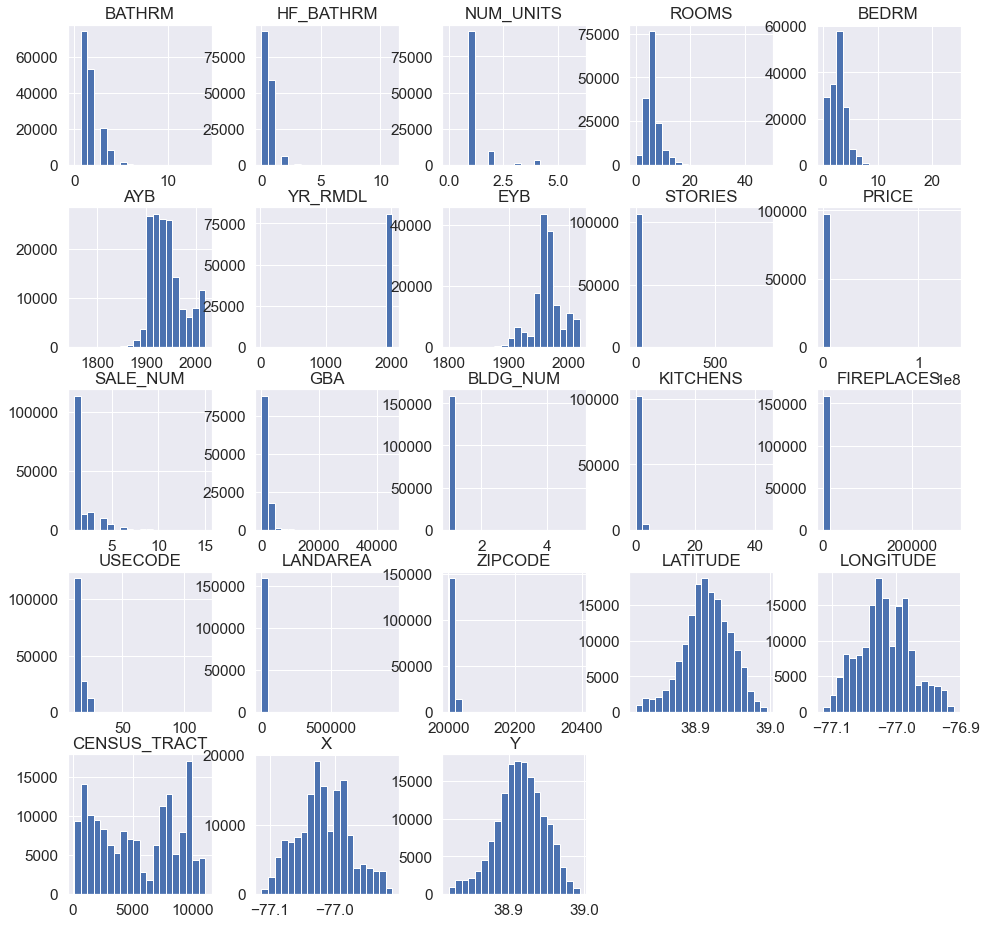

In [88]:
properties.hist(figsize=(16,16), bins=20);

# Гистограммы не показали какие-то уникальные распределения.
# Построим кореляционную матрицу и посмотрим на зависимость данных друг от друга

                BATHRM  HF_BATHRM  NUM_UNITS     ROOMS     BEDRM       AYB  \
BATHRM        1.000000   0.248759   0.403431  0.677751  0.655563 -0.039036   
HF_BATHRM     0.248759   1.000000  -0.151393  0.353825  0.375568 -0.009381   
NUM_UNITS     0.403431  -0.151393   1.000000  0.524724  0.330551 -0.104176   
ROOMS         0.677751   0.353825   0.524724  1.000000  0.841309 -0.219215   
BEDRM         0.655563   0.375568   0.330551  0.841309  1.000000 -0.242793   
AYB          -0.039036  -0.009381  -0.104176 -0.219215 -0.242793  1.000000   
YR_RMDL       0.239797   0.148483  -0.015551  0.161396  0.214655  0.021744   
EYB           0.269444   0.235645  -0.069551  0.158847  0.168913  0.660320   
STORIES       0.042349   0.033270   0.019268  0.039352  0.040859 -0.011102   
PRICE        -0.006536  -0.013113  -0.000469 -0.038241 -0.043331  0.056052   
SALE_NUM      0.068399   0.002193   0.013986 -0.034828 -0.024835  0.017127   
GBA           0.682977   0.272598   0.264009  0.679725  0.631736

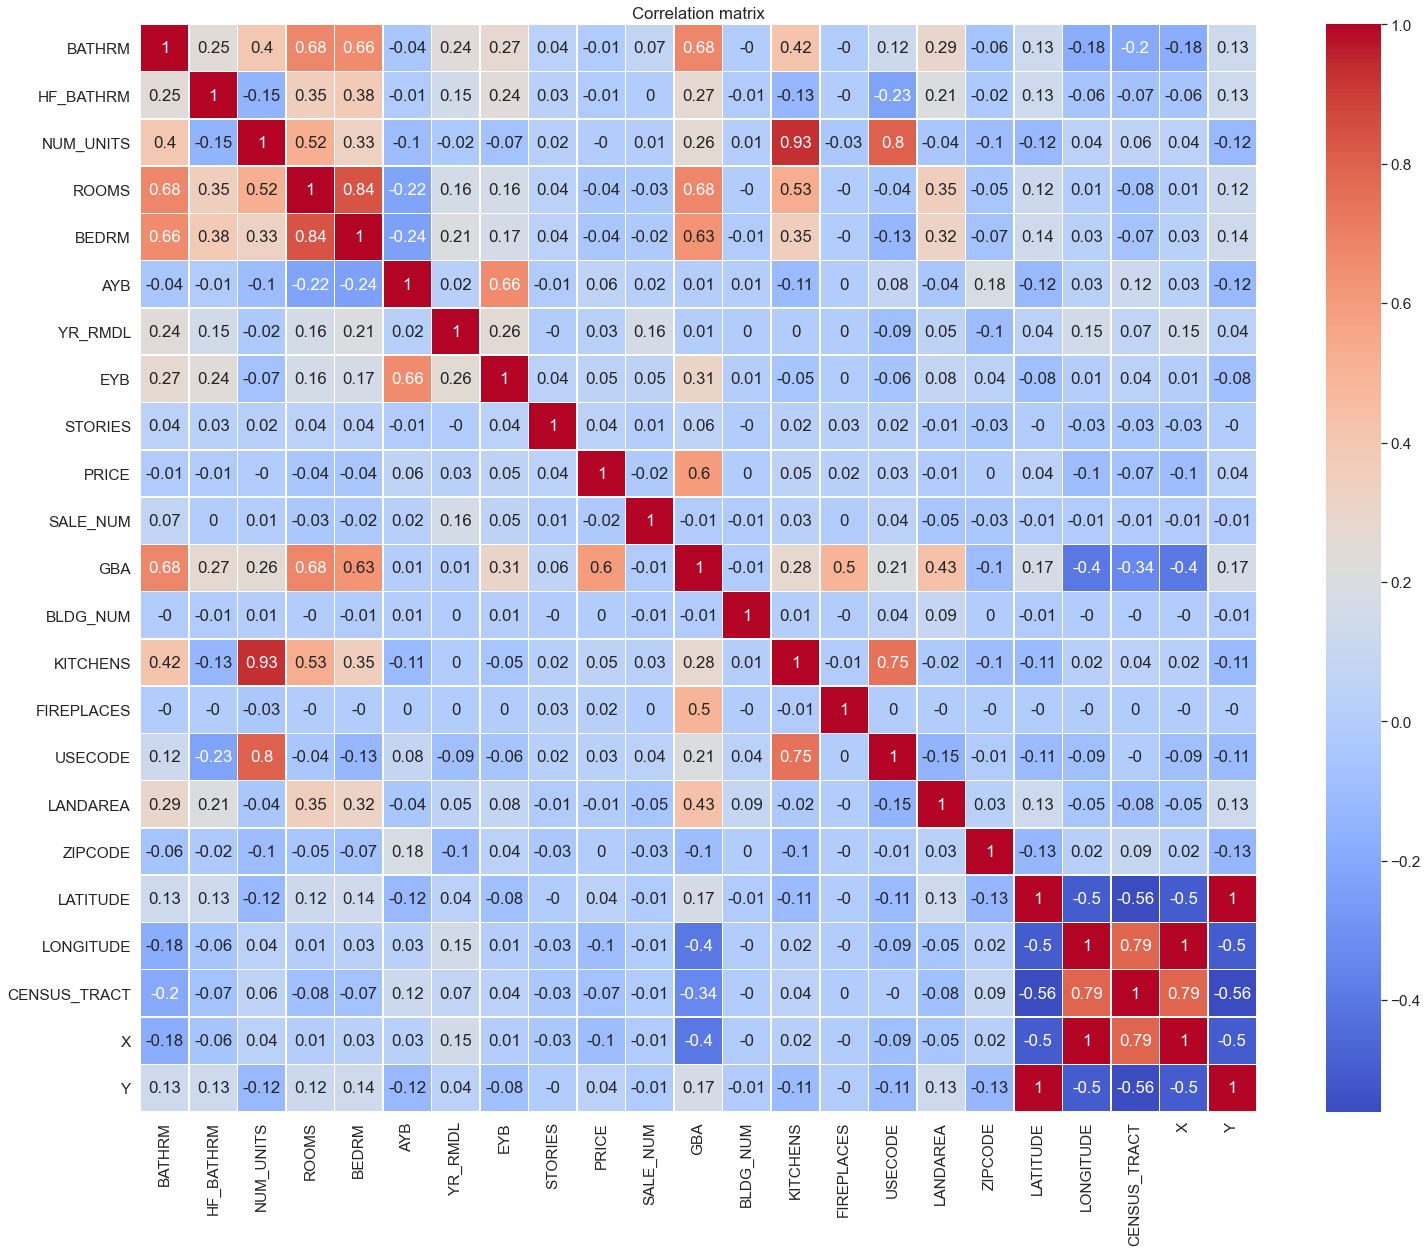

In [89]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)

corr_matrix = properties.corr()
print(properties.corr())
corr_matrix = np.round(corr_matrix, 2)
#corr_matrix[np.abs(corr_matrix) < 0.2] = 0  # Проверьте, что будет если убрать маленькие корреляции

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

# Кроме очевидных корелляций по типу - количество комнат кореллирует с количеством ванн, я не выявил

## X и Longitude, Y и Latitude идентичны(кореляционная матрица и гистограммы это доказывают) => можно удалить X и Y

In [90]:
properties = properties.drop(['X', 'Y'], axis=1)

In [91]:
print(properties.shape)
print(properties.drop_duplicates().shape)

(158957, 44)
(156304, 44)


Дубликатов около 2000, относительно общего количества немного(меньше процента), так что спокойно их удаляем

In [92]:
properties = properties.drop_duplicates()

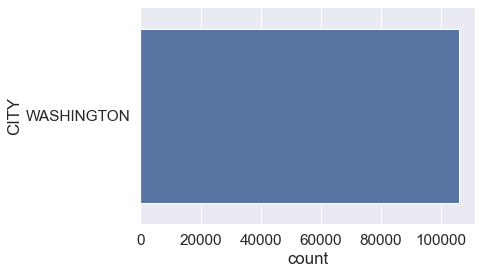

In [93]:
sns.countplot(y = 'CITY', data = properties)

In [94]:
properties.CITY.value_counts()

WASHINGTON    106051
Name: CITY, dtype: int64

In [95]:
properties.STATE.value_counts()

DC    106051
Name: STATE, dtype: int64

## Столбцы город и штат тоже можно не учитывать, он везде одинаковый.  Но пропущена где- то треть значений. Возможно потому что другой город. Нужно построить карту и посмотреть, если нет, то можно спокойно удалять.

In [96]:
properties = properties.drop(['CITY', 'STATE'], axis = 1)

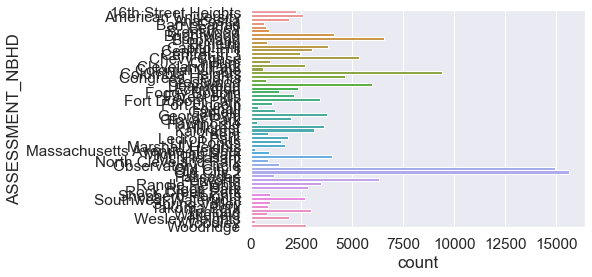

In [97]:
sns.countplot(y = 'ASSESSMENT_NBHD', data = properties)#район, оставим пока

## Номер дома,полный адресс, почтовые коды тоже вряд ли дадут нам много полезной информации(ведь есть координаты)

In [98]:
properties = properties.drop(['BLDG_NUM','FULLADDRESS', 'ZIPCODE', 'USECODE','CENSUS_TRACT'], axis = 1)

После удаления большого количества данных, попробуем построить парные распределения

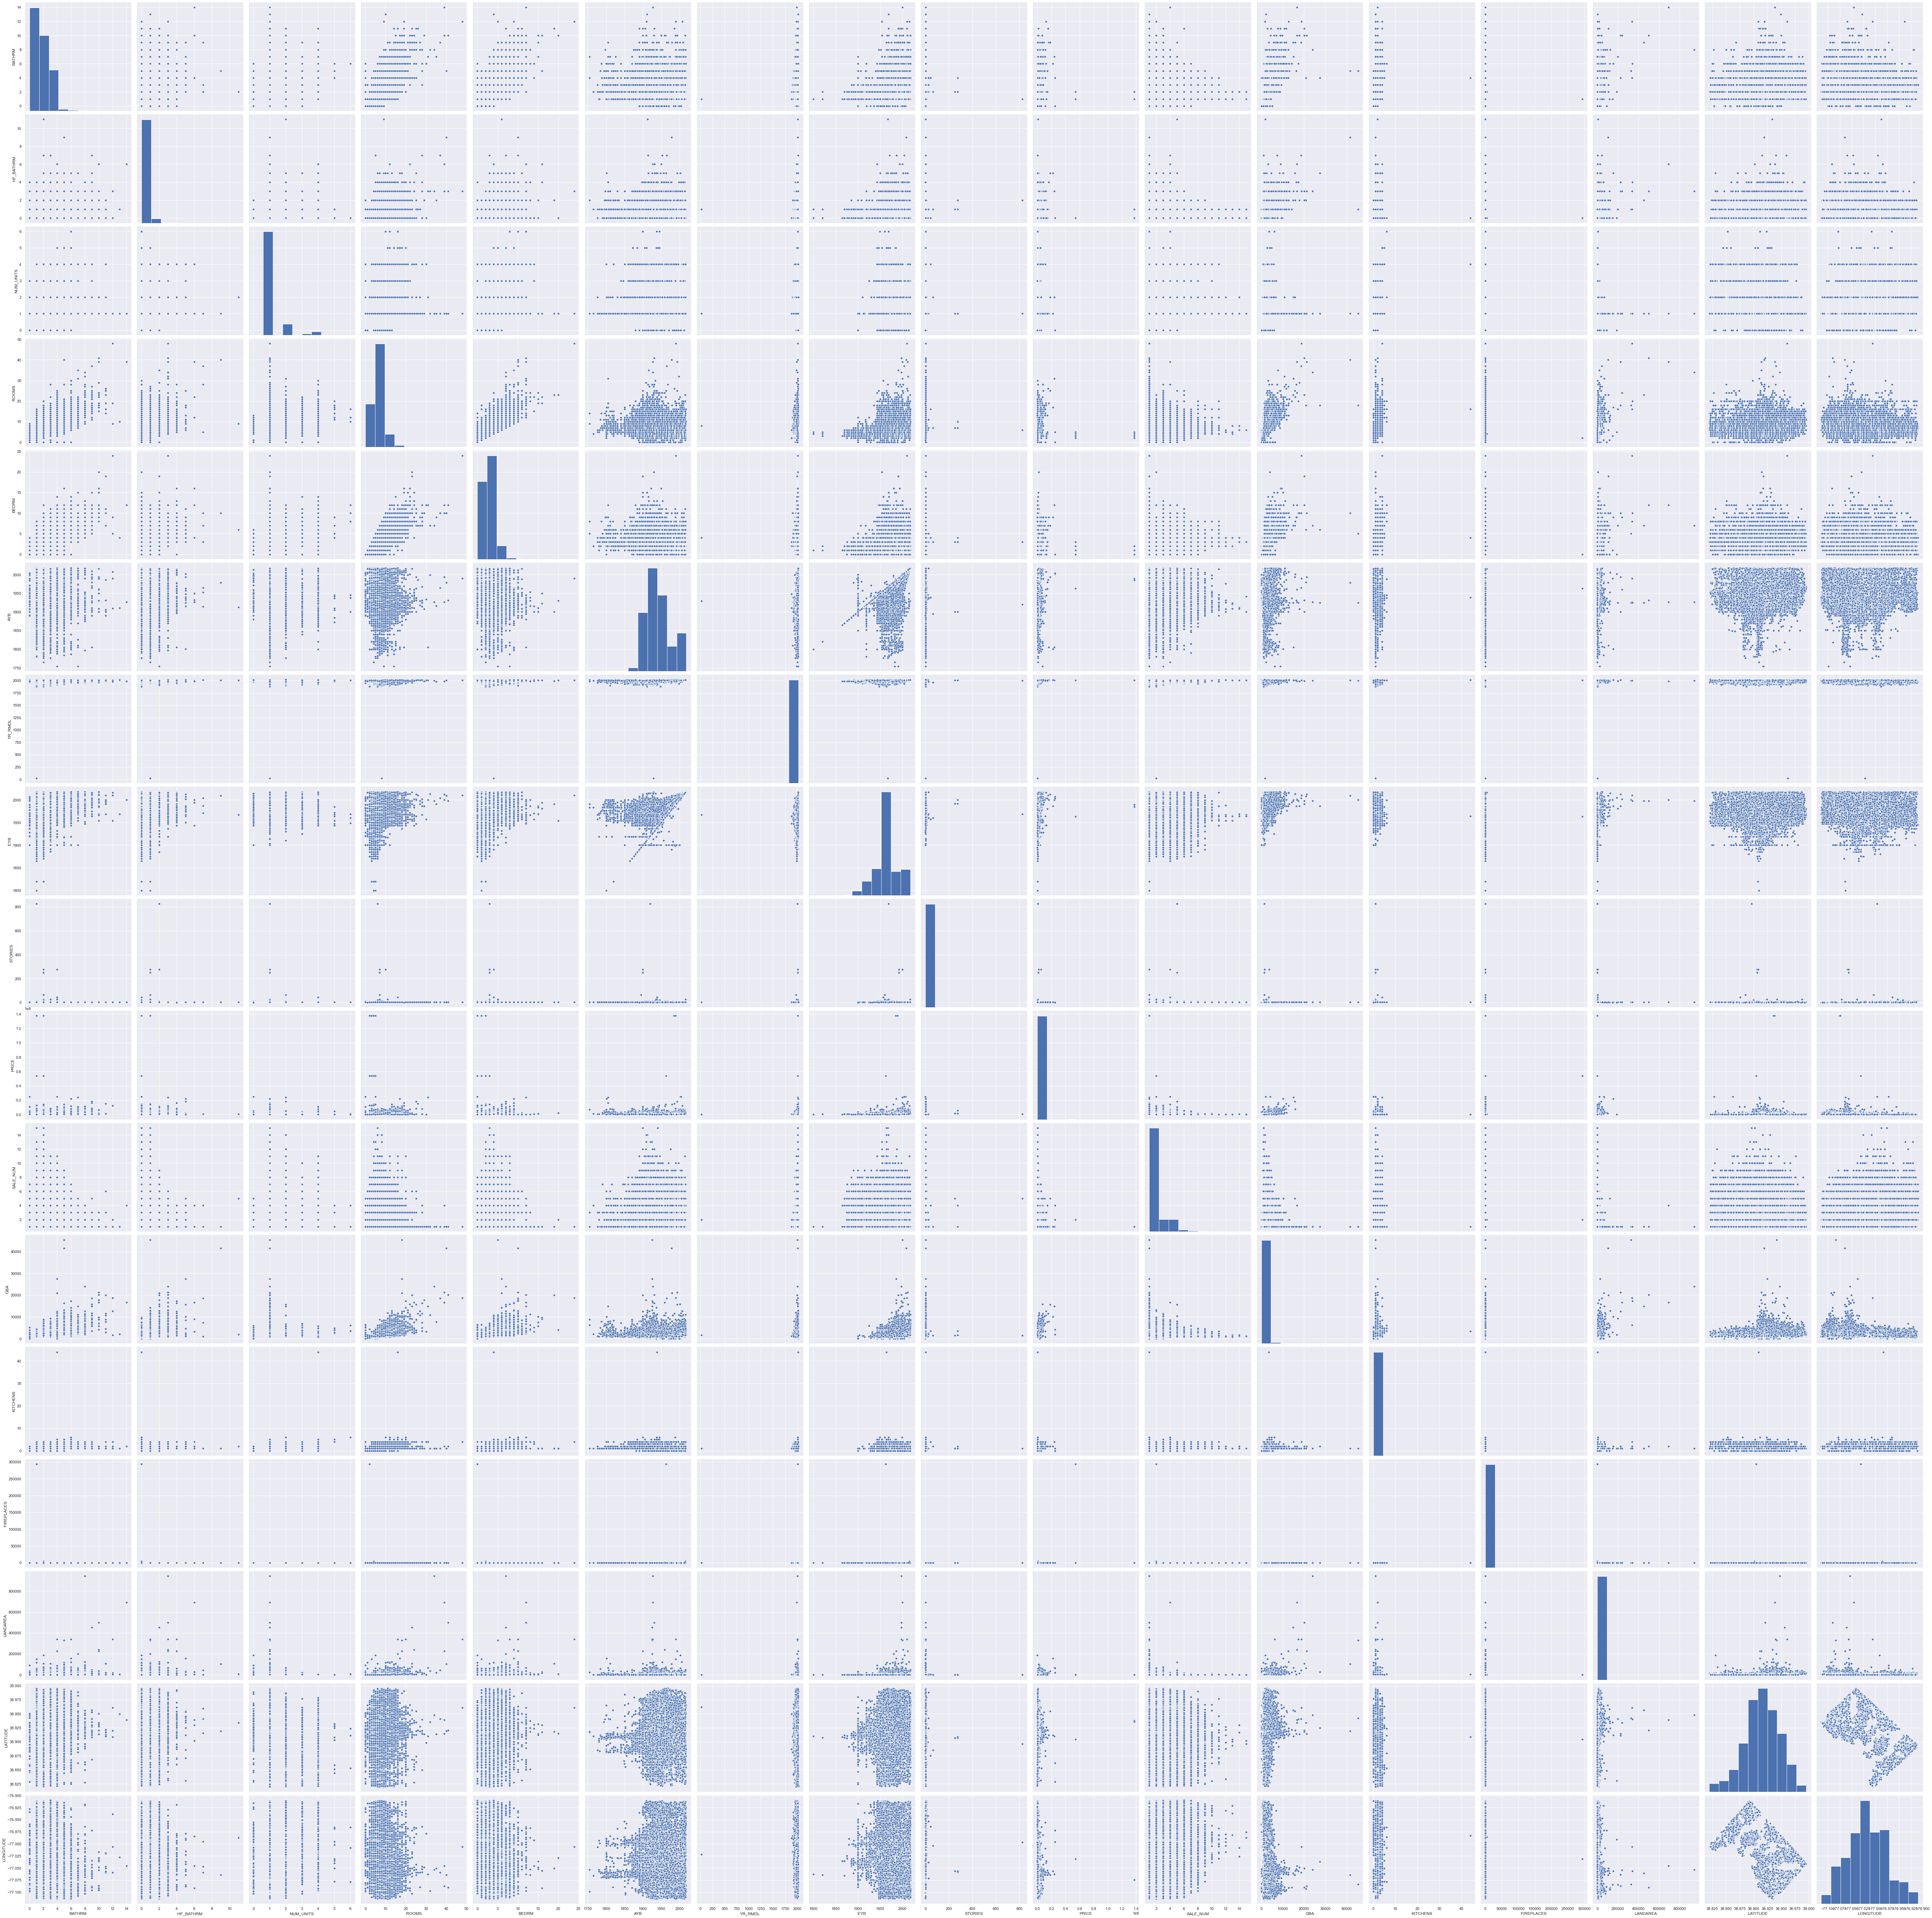

In [99]:
sns.set()
sns.pairplot(properties, height = 4.5)
plt.show()

# В основном числовые данные распределены по категориям(небольшое количество уникальных значений и определенных зависимостей не выявлено) 

              BATHRM  HF_BATHRM  NUM_UNITS     ROOMS     BEDRM       AYB  \
BATHRM      1.000000   0.244038   0.403398  0.675239  0.653097 -0.034535   
HF_BATHRM   0.244038   1.000000  -0.151366  0.347940  0.369757 -0.006472   
NUM_UNITS   0.403398  -0.151366   1.000000  0.524648  0.330560 -0.104184   
ROOMS       0.675239   0.347940   0.524648  1.000000  0.838475 -0.214175   
BEDRM       0.653097   0.369757   0.330560  0.838475  1.000000 -0.238736   
AYB        -0.034535  -0.006472  -0.104184 -0.214175 -0.238736  1.000000   
YR_RMDL     0.236388   0.144431  -0.015551  0.156275  0.209151  0.024168   
EYB         0.270549   0.235290  -0.069526  0.159101  0.169099  0.659289   
STORIES     0.042350   0.033270   0.019271  0.039356  0.040859 -0.011102   
PRICE       0.067167   0.030261  -0.000407  0.028564  0.027635  0.017974   
SALE_NUM    0.064035  -0.001860   0.014008 -0.043030 -0.033414  0.021836   
GBA         0.682974   0.272609   0.263994  0.679738  0.631735  0.006703   
KITCHENS    

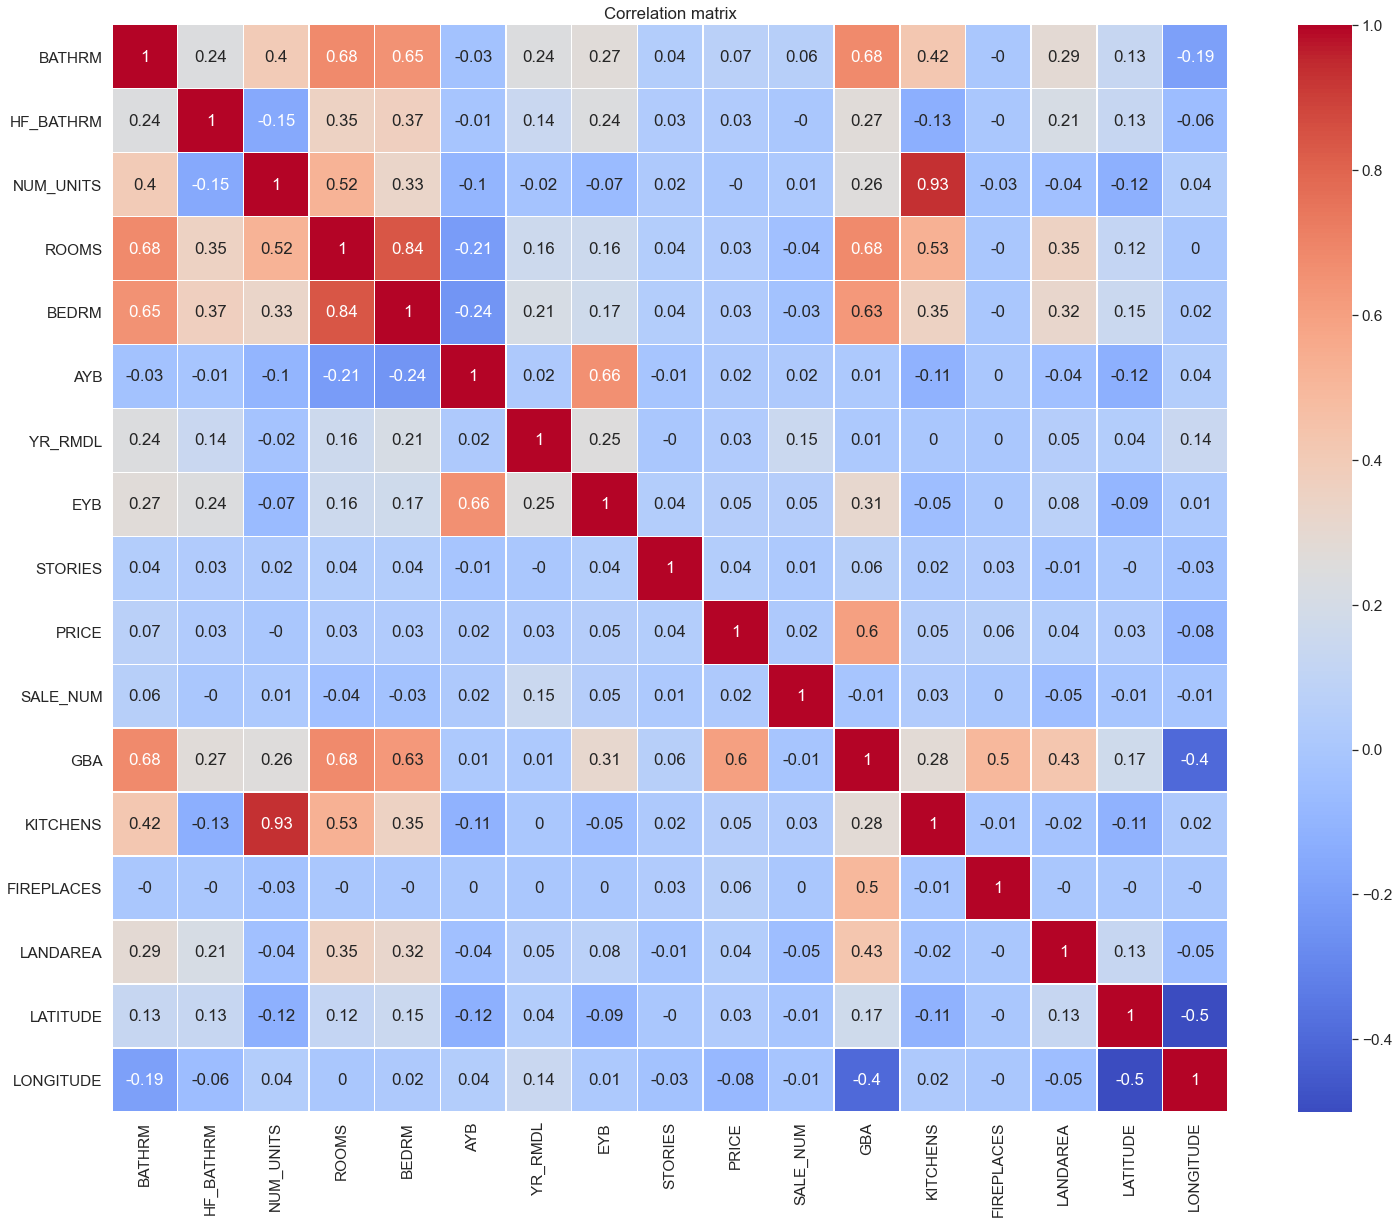

In [100]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)

corr_matrix = properties.corr()
print(properties.corr())
corr_matrix = np.round(corr_matrix, 2)
#corr_matrix[np.abs(corr_matrix) < 0.2] = 0  # Проверьте, что будет если убрать маленькие корреляции

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

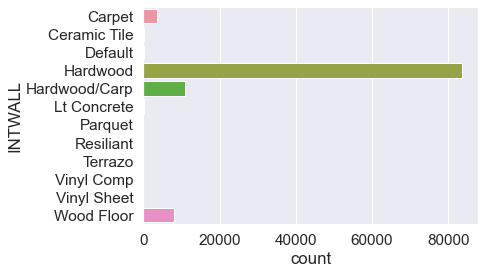

In [101]:
sns.countplot(y = 'INTWALL', data = properties)#БОЛЬШОЕ КОЛИЧЕСТВО ОДНОЙ КАТЕГОРИИ, ВОЗМОЖНО ДРУГИЕ ДАННЫЕ БУДУТ СОПРОВОЖДАТЬСЯ ВЫБРОСАМИ

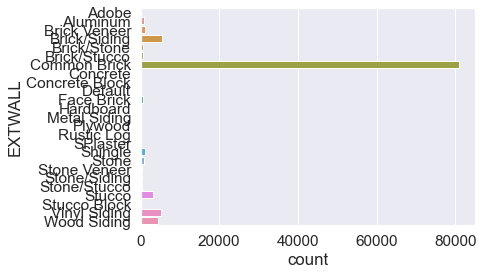

In [102]:
sns.countplot(y = 'EXTWALL', data = properties)# АНАЛОГИЧНО

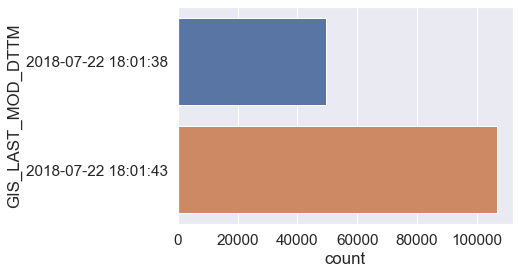

In [103]:
sns.countplot(y = 'GIS_LAST_MOD_DTTM', data = properties)#2 КАТЕГОРИИ времени, разница в 5 секунд(просто парсинг данных - удаляем)
properties = properties.drop('GIS_LAST_MOD_DTTM', axis = 1)

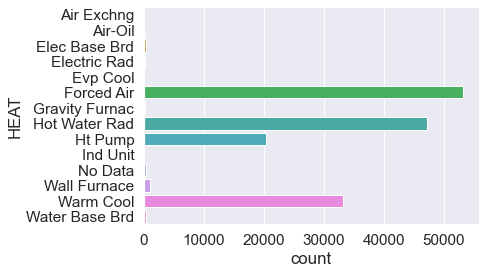

In [104]:
sns.countplot(y = 'HEAT', data = properties)#3-4 КРУПНЫХ КАТЕГОРИИ, ОСТАЛЬНЫЕ БОЛЬШЕ ДЛЯ ОТСЛЕЖИВАНИЯ ВЫБРОСОВ

## Построим карту города Вашингтон с обозначенными домами

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


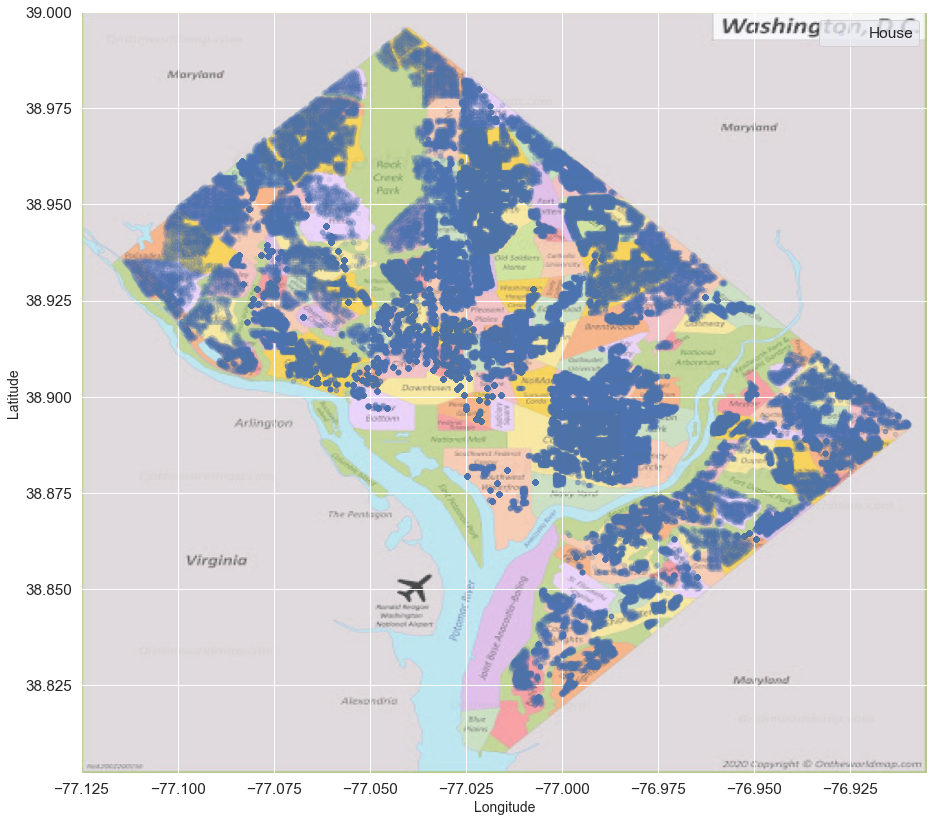

In [105]:
california_img=mpimg.imread('wasi.jpg')
properties.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', alpha=0.1,
                    label='House', figsize=(20,14),
                    cmap=plt.get_cmap('brg'))
plt.imshow(california_img, extent=[-77.125, -76.905, 38.802, 39.000], alpha=0.7)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.show()

## Между 2мя частями города проходит река, попробуем разделить эти районы - построим прямую, которая сможет разделить эти районы

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


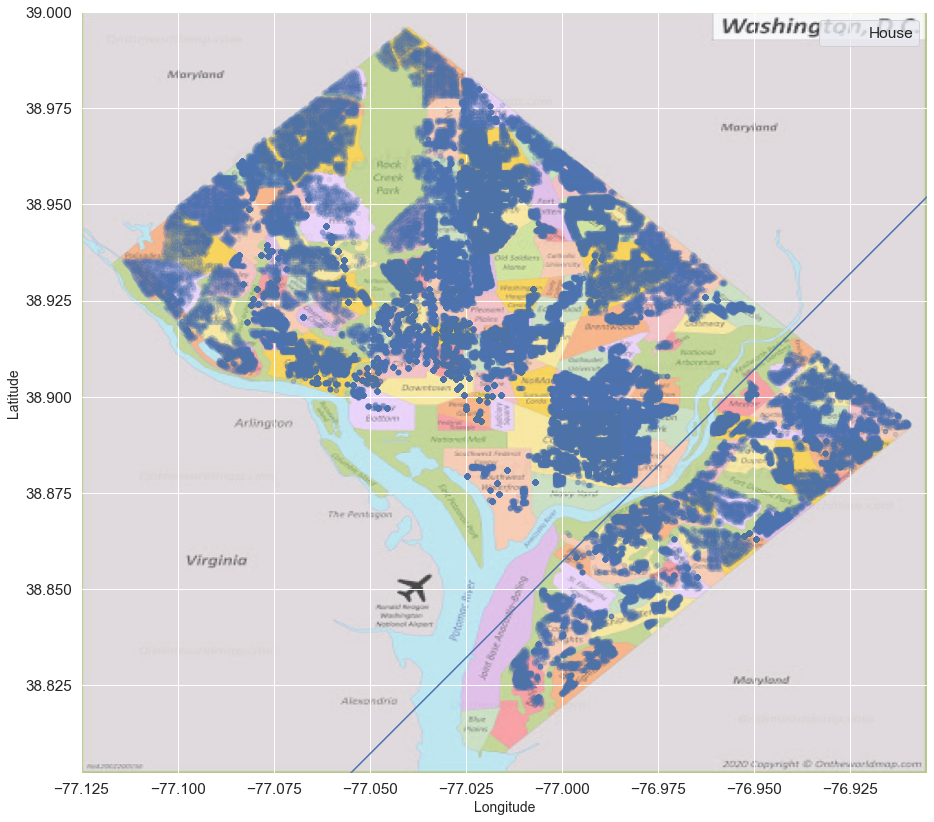

In [106]:
california_img=mpimg.imread('wasi.jpg')
properties.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', alpha=0.1,
                    label='House', figsize=(20,14),
                    cmap=plt.get_cmap('brg'))
plt.plot(np.arange(-77.06, -76.9, 0.002), [y + 115.857 for y in np.arange(-77.06, -76.9, 0.002)])
plt.imshow(california_img, extent=[-77.125, -76.905, 38.802, 39.000], alpha=0.7)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.show()

# Несколько домов будут классифицироваться неточно но на общие данные это не повлияет(там намного меньше 1%)

# Теперь разделим эти районы на 2 класса - по двум сторонам реки и построим график, чтобы убедиться в верности разделения

In [107]:
types = []
for i in range(len(properties.LATITUDE.values)):
    if (properties.LATITUDE.values[i] <= properties.LONGITUDE.values[i] + 115.857):
        types.append(1)
    else:
        types.append(0)
properties['RIVER'] = types

<ipython-input-107-31c80c3ccb9b>:3: RuntimeWarning: invalid value encountered in less_equal
  if (properties.LATITUDE.values[i] <= properties.LONGITUDE.values[i] + 115.857):


In [108]:
len(types)

156304

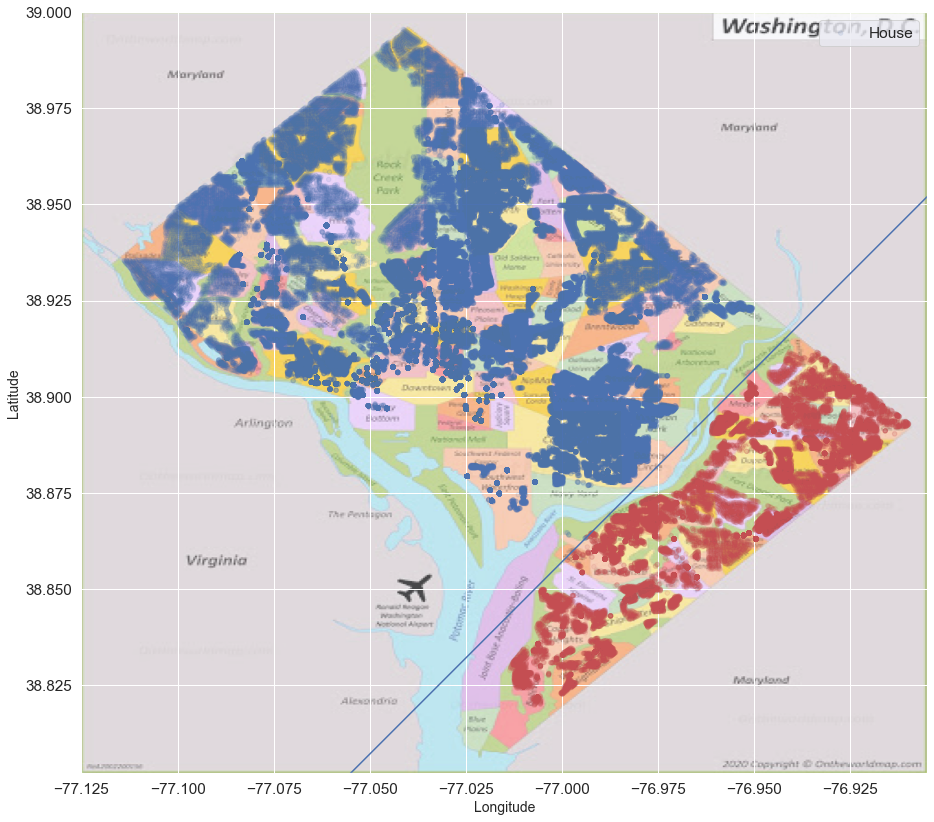

In [109]:
colors = np.where(properties["RIVER"]== 1,'r','b')
california_img=mpimg.imread('wasi.jpg')
properties.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', alpha=0.1,
                    label='House', figsize=(20,14),
                    cmap=plt.get_cmap('brg'), c= colors)
plt.plot(np.arange(-77.06, -76.9, 0.002), [y + 115.857 for y in np.arange(-77.06, -76.9, 0.002)])
plt.imshow(california_img, extent=[-77.125, -76.905, 38.802, 39.000], alpha=0.7)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.show()

# Посмотрим на зависимость данных от положения относительно реки.

              BATHRM  HF_BATHRM  NUM_UNITS     ROOMS     BEDRM       AYB  \
BATHRM      1.000000   0.244038   0.403398  0.675239  0.653097 -0.034535   
HF_BATHRM   0.244038   1.000000  -0.151366  0.347940  0.369757 -0.006472   
NUM_UNITS   0.403398  -0.151366   1.000000  0.524648  0.330560 -0.104184   
ROOMS       0.675239   0.347940   0.524648  1.000000  0.838475 -0.214175   
BEDRM       0.653097   0.369757   0.330560  0.838475  1.000000 -0.238736   
AYB        -0.034535  -0.006472  -0.104184 -0.214175 -0.238736  1.000000   
YR_RMDL     0.236388   0.144431  -0.015551  0.156275  0.209151  0.024168   
EYB         0.270549   0.235290  -0.069526  0.159101  0.169099  0.659289   
STORIES     0.042350   0.033270   0.019271  0.039356  0.040859 -0.011102   
PRICE       0.067167   0.030261  -0.000407  0.028564  0.027635  0.017974   
SALE_NUM    0.064035  -0.001860   0.014008 -0.043030 -0.033414  0.021836   
GBA         0.682974   0.272609   0.263994  0.679738  0.631735  0.006703   
KITCHENS    

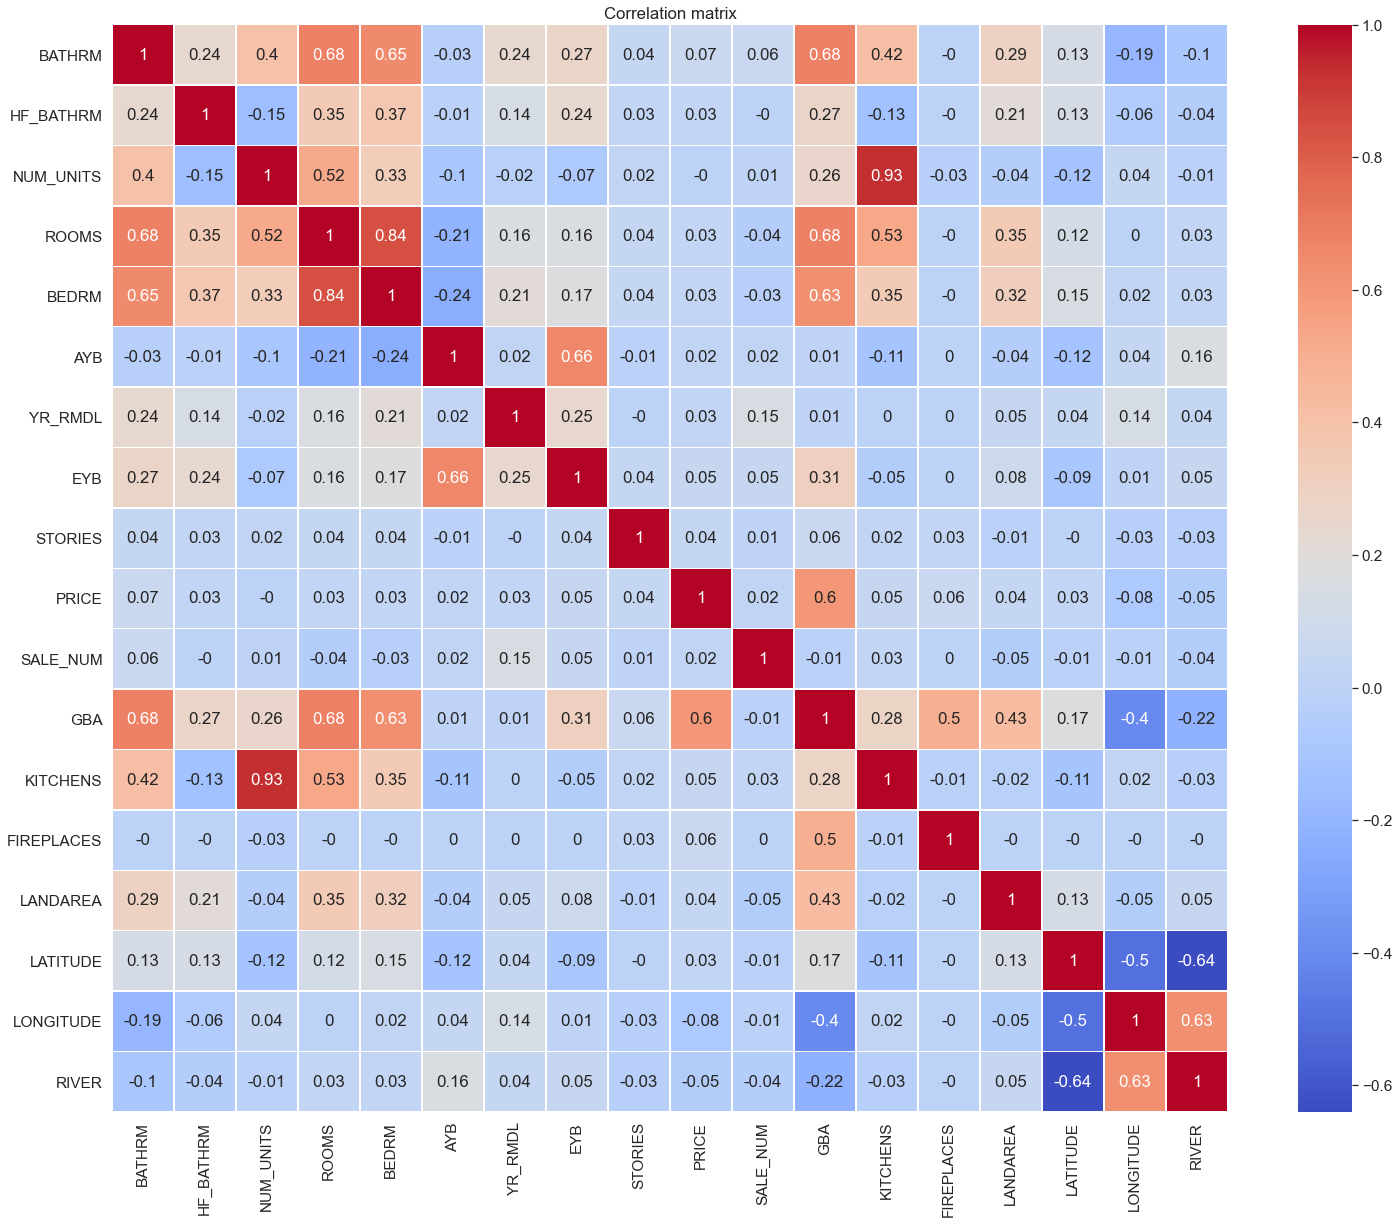

In [110]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)

corr_matrix = properties.corr()
print(properties.corr())
corr_matrix = np.round(corr_matrix, 2)
#corr_matrix[np.abs(corr_matrix) < 0.2] = 0  # Проверьте, что будет если убрать маленькие корреляции

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

# С первого взгляда зависимостей никаких нет. Но есть одно предположения. Когда города строились они в основном строились возле реки с одной стороны, а затем уже строились мосты и территории расширялись. А вдруг с Вашингтоном было так же?

In [111]:
properties = properties.drop('RIVER', axis = 1)
types = []
for i in range(len(properties.LATITUDE.values)):
    if (properties.LATITUDE.values[i] <= properties.LONGITUDE.values[i] + 115.857):
        types.append('Under')
    else:
        types.append('Above')
properties['RIVER'] = types #изменим тип на категориальный(числовой был только ради корелляции)

<ipython-input-111-54067163be42>:4: RuntimeWarning: invalid value encountered in less_equal
  if (properties.LATITUDE.values[i] <= properties.LONGITUDE.values[i] + 115.857):


In [112]:
len(types)

156304

In [113]:
properties = properties.drop_duplicates()

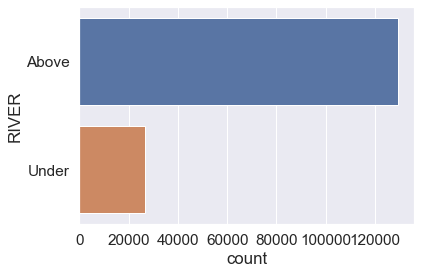

In [114]:
sns.countplot(y = 'RIVER', data = properties)

# Разница количества неудивительна, ведь площадь над рекой намного больше площади под рекой + центр города более густонаселен.
## Отловим слишком большие выбросы, а дальше начнем исследовать.

In [115]:
properties[properties.AYB < 1500]

Empty DataFrame
Columns: [BATHRM, HF_BATHRM, HEAT, AC, NUM_UNITS, ROOMS, BEDRM, AYB, YR_RMDL, EYB, STORIES, SALEDATE, PRICE, QUALIFIED, SALE_NUM, GBA, STYLE, STRUCT, GRADE, CNDTN, EXTWALL, ROOF, INTWALL, KITCHENS, FIREPLACES, LANDAREA, SOURCE, NATIONALGRID, LATITUDE, LONGITUDE, ASSESSMENT_NBHD, ASSESSMENT_SUBNBHD, CENSUS_BLOCK, WARD, SQUARE, QUADRANT, RIVER]
Index: []

[0 rows x 37 columns]

# Их нет, так что можем продолжать

## Построим гистограмм и ящик с усами для количества домов в зависимости от расположения

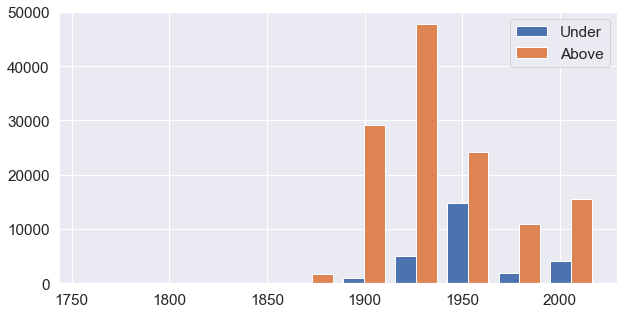

In [116]:
plt.figure(figsize=(10,5))
plt.hist([properties[properties['RIVER'] == 'Under']['AYB'], properties[properties['RIVER'] != 'Under']['AYB']], label=['Under', 'Above'])
plt.legend(loc='upper right')
plt.show()

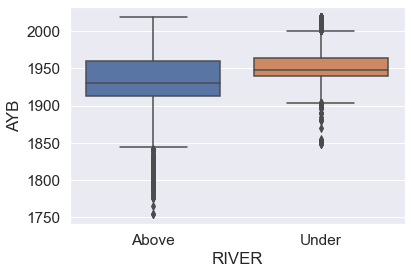

In [117]:
sns.boxplot(x = 'RIVER', y = 'AYB', data = properties)

# Эти графики наталкивают на мысль, что средний возраст домов построенных ниже реки построены позже(медиана смещена вверх)

# В связи с наблюдениями выше выдвенем гипотезу: Город ниже реки является новым, т.е большая часть его домов отстроена годами позже, чем город над рекой
Разделим датасет на 2 в зависимости от положения и возьмем только интересующий нас столбец

In [118]:
data_under = properties[properties['RIVER'] == 'Under']['AYB']
data_above = properties[properties['RIVER'] != 'Under']['AYB']

In [119]:
data_under.describe()

count    26787.000000
mean      1953.799072
std         26.493561
min       1848.000000
25%       1940.000000
50%       1947.000000
75%       1964.000000
max       2018.000000
Name: AYB, dtype: float64

In [120]:
data_above.describe()

count    129497.000000
mean       1938.724365
std          34.394901
min        1754.000000
25%        1913.000000
50%        1930.000000
75%        1959.000000
max        2019.000000
Name: AYB, dtype: float64

In [121]:
print(data_under.mean(), data_under.median())
print(data_above.mean(),data_above.median())

1953.799072265625 1947.0
1938.724365234375 1930.0


# Средние отличаются значительно

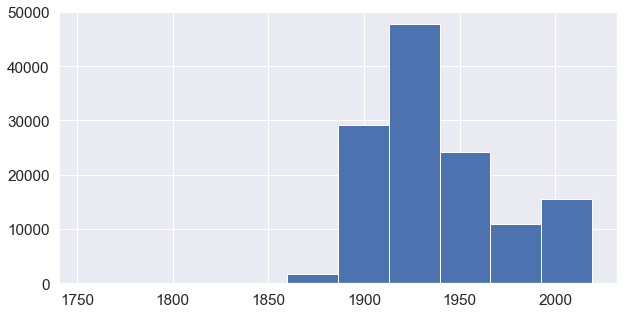

In [122]:
plt.figure(figsize=(10,5))
plt.hist(data_above.values)
plt.show()

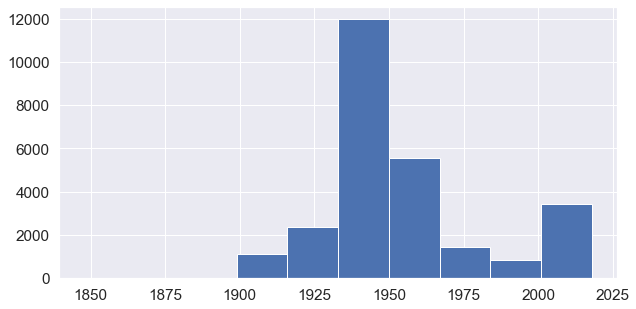

In [123]:
plt.figure(figsize=(10,5))
plt.hist(data_under.values)
plt.show()

Данные не похожи на нормальные в связи с выбросами в конце. Скорее всего они не ошибочны и в нынешнее время строительство действительно ускорилось.

Проверим выборки на нормальность:

In [124]:
scs.kstest(data_under.values, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [125]:
scs.kstest(data_above.values, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [126]:
scs.jarque_bera(data_under.values)

Jarque_beraResult(statistic=3067.6284485252945, pvalue=0.0)

In [127]:
scs.jarque_bera(data_above.values)

Jarque_beraResult(statistic=7954.458279532426, pvalue=0.0)

# Статистические тесты показали верность нашего предположения о ненормальности распределения.
## Применим тесты о равенстве матожиданий.

In [128]:
alpha = 0.05
mw = scs.mannwhitneyu(data_under, data_above)
print('Diffs is {}significant\n'.format( {True:'not ',False:''}[mw[1] > alpha]))

Diffs is significant



In [129]:

st = scs.ttest_ind(data_under, data_above)
print('Diffs is {}significant\n'.format( {True:'not ',False:''}[st[1] > alpha]))

Diffs is significant



# Оба теста говорят о неверности нулевой гипотезы о равенстве матожиданий, то есть мы принимаем альтернативную гипотезу о том, что действительно дома под рекой построены позже.

## Приведем выборки к нормальному распределению,  чтобы удостовериться в правдоподобности t-testа

In [130]:
data_above_norm = bs.bootstrap(data_above.values, stat_func = bs_stats.mean, num_iterations = 1000, return_distribution = True, iteration_batch_size = 50)
data_under_norm = bs.bootstrap(data_under.values, stat_func = bs_stats.mean, num_iterations = 1000, return_distribution = True, iteration_batch_size = 50)

In [131]:
data_above_norm

array([1939.1265, 1939.2363, 1939.0613, 1939.1818, 1939.0945, 1939.0696,
       1939.2657, 1939.098 , 1939.1309, 1938.8784, 1939.0295, 1939.0701,
       1938.985 , 1939.2441, 1938.9543, 1939.0236, 1939.2474, 1939.0768,
       1939.191 , 1939.1968, 1939.0947, 1939.1454, 1939.1654, 1939.2495,
       1939.221 , 1939.0645, 1939.2075, 1939.0979, 1939.1653, 1939.0581,
       1939.1642, 1939.0979, 1939.0138, 1939.1483, 1938.9803, 1939.1178,
       1939.0668, 1939.0317, 1939.2516, 1939.1302, 1939.1335, 1938.9287,
       1939.1926, 1939.1443, 1939.3315, 1938.9536, 1939.0596, 1939.3845,
       1938.96  , 1939.0148, 1939.0155, 1939.261 , 1939.1852, 1939.2328,
       1938.9387, 1939.0973, 1939.1393, 1939.0038, 1939.2611, 1939.185 ,
       1939.1001, 1939.1001, 1939.1862, 1939.2372, 1939.0778, 1939.1978,
       1939.2838, 1939.1055, 1939.389 , 1939.2117, 1939.0845, 1939.1469,
       1939.3722, 1939.1658, 1939.2189, 1939.1903, 1939.1714, 1939.0492,
       1939.1365, 1939.0724, 1939.0786, 1939.1263, 

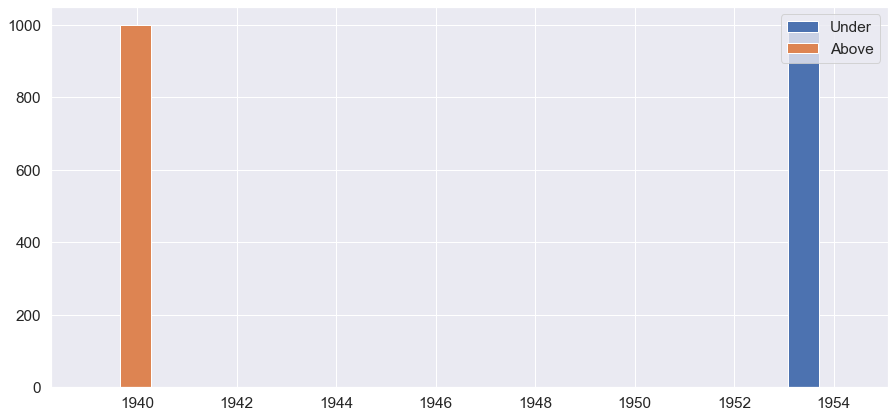

In [132]:
plt.figure(figsize=(15,7))
plt.hist([data_under_norm, data_above_norm] , label=['Under', 'Above'])
plt.legend(loc='upper right')
plt.show()

In [133]:
n = np.concatenate((data_above_norm, data_under_norm))
a = []
b = []
for i in range(1000):
    a.append('Above')
    b.append('Under')
    d = {'value': n,
    'group': a+b }

data = pd.DataFrame(d)

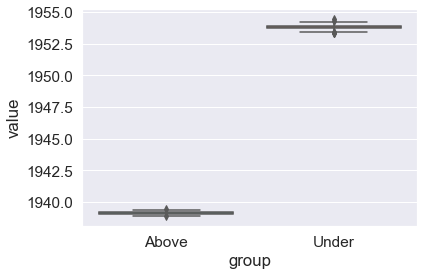

In [134]:
sns.boxplot(y = 'value', x = 'group', data = data, palette = 'Set2')

# Проверим полученные распределения на нормальность

In [135]:
scs.jarque_bera(data_under_norm)

Jarque_beraResult(statistic=0.6207231742309688, pvalue=0.7331817991965985)

In [136]:
scs.jarque_bera(data_above_norm)

Jarque_beraResult(statistic=1.7427723236606216, pvalue=0.418371216911512)

# Далее проведем ttest

In [137]:
alpha = 0.05
st = scs.ttest_ind(data[data['group'] == 'Under']['value'], data[data['group'] != 'Under']['value'])
print('Diffs is {}significant\n'.format( {True:'',False:'not '}[st[1] < alpha]))

Diffs is significant



# И действительно, получаем, что разница статистически значима, что подтверждает верность альтернативной гипотезы о различном возрасте домов по разную сторону от реки

# Вывод : дома на противоположной стороне реки были остроены позже - это относительно новая часть города